## Machine Learning

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = [["ID_1", 0.4, 0.2, 0.3],
        ["ID_2", 0.9, 0.5, 0.7],
        ["ID_3", 0.3, 0.3, 0.2]]

df = pd.DataFrame(data=data, columns=['restaurant_id', "Score1", "Score2", "Score3"])

df

,restaurant_id,Score1,Score2,Score3
0,ID_1,0.4,0.2,0.3
1,ID_2,0.9,0.5,0.7
2,ID_3,0.3,0.3,0.2


In [2]:
from sklearn.decomposition import PCA

print("If you want two components")
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df.drop(columns=['restaurant_id']))

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

If you want two components


In [3]:
principalDf

,principal component 1,principal component 2
0,-0.199955,0.074657
1,0.502128,-0.009488
2,-0.302173,-0.065169


## Function

In [4]:
def findComponents(dataframe=None, component_you_want=1):
    result = dataframe[['restaurant_id']]
    from sklearn.decomposition import PCA
    pca = PCA(n_components=component_you_want)
    principalComponents = pca.fit_transform(df.drop(columns=['restaurant_id']))
    columns = []
    for i in range(0, component_you_want):
        columns.append("Score_"+str(i))
    principalDf = pd.DataFrame(data = principalComponents
             , columns = columns)
    result[principalDf.columns] = principalDf.values
    return result

In [5]:
findComponents(df)

,restaurant_id,Score_0
0,ID_1,-0.199955
1,ID_2,0.502128
2,ID_3,-0.302173


In [6]:
print("If you want more components")

If you want more components


In [7]:
findComponents(df, component_you_want=2)

,restaurant_id,Score_0,Score_1
0,ID_1,-0.199955,0.074657
1,ID_2,0.502128,-0.009488
2,ID_3,-0.302173,-0.065169


In [8]:
def findComponents(dataframe=None):
    result = dataframe[['restaurant_id']]
    from sklearn.decomposition import PCA
    pca = PCA(n_components=1)
    principalComponents = pca.fit_transform(df.drop(columns=['restaurant_id']))
    columns = []
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Score'])
    result[principalDf.columns] = principalDf.values
    return result

In [9]:
findComponents(df)

,restaurant_id,Score
0,ID_1,-0.199955
1,ID_2,0.502128
2,ID_3,-0.302173


## SQL

In [10]:
!pip install pandasql

In [11]:
from pandasql import sqldf
import pandas as pd

In [12]:
data = [["2022-8-1","ID_1", "1"],
        ["2022-8-1","ID_1", "2"],
        ["2022-8-1","ID_2", "1"],
        ["2022-8-1","ID_2", "2"],
        ["2022-8-1","ID_2", "3"],
        ["2022-8-2","ID_1", "11"],
        ["2022-8-2","ID_1", "12"],
        ["2022-8-3","ID_2", "21"],
        ["2022-8-3","ID_2", "12"],
        ["2022-8-4","ID_2", "23"]] 

data = pd.DataFrame(data=data, columns=['delivery_date', 'restaurant_id', 'order_id'])
data['delivery_date'] = pd.to_datetime(data['delivery_date'])
data

,delivery_date,restaurant_id,order_id
0,2022-08-01,ID_1,1
1,2022-08-01,ID_1,2
2,2022-08-01,ID_2,1
3,2022-08-01,ID_2,2
4,2022-08-01,ID_2,3
5,2022-08-02,ID_1,11
6,2022-08-02,ID_1,12
7,2022-08-03,ID_2,21
8,2022-08-03,ID_2,12
9,2022-08-04,ID_2,23


In [13]:
q = "select delivery_date, count(distinct  restaurant_id) as restaurant_count, \
     (select count(order_id) from data where strftime('%d', delivery_date))-1 = strftime('%d', delivery_date) \
     as restaurant_count_ordered_1d \
     from data where strftime('%m', delivery_date) = '08' group by delivery_date"
sqldf(q, globals())

,delivery_date,restaurant_count,restaurant_count_ordered_1d
0,2022-08-01 00:00:00.000000,2,0
1,2022-08-02 00:00:00.000000,1,0
2,2022-08-03 00:00:00.000000,1,0
3,2022-08-04 00:00:00.000000,1,0


In [14]:
# !pip install sqlalchemy==1.3.0

In [15]:
sqldf("SELECT date(adddate(curdate(), interval -30 day)) from data", globals())

PandaSQLException: (sqlite3.OperationalError) near "day": syntax error
[SQL: SELECT date(adddate(curdate(), interval -30 day)) from data]
(Background on this error at: http://sqlalche.me/e/e3q8)

## Python

In [16]:
from datetime import datetime, timedelta
import calendar

def upcoming_order_day(place_PO, recieve_PO, Days, Today_date):   
    result = []
    
    days = [Today_date+timedelta(i) for i in [0, 1, 2, 3, 4, 5, 6, 7]]
    
    start_day = None
    
    for i in days:
        if calendar.day_name[i.weekday()] in place_PO:
            start_day = i
            break
    
    recieve_day = start_day + timedelta(Days)
    
    days = [recieve_day+timedelta(i) for i in [0, 1, 2, 3, 4, 5, 6, 7]]
    
    recieve_day = None
    
    for i in days:
        if calendar.day_name[i.weekday()] in recieve_PO:
            recieve_day = i
            break
    
    result = [start_day.date(), recieve_day.date()]
    
    return "upcoming_order_day("+str(place_PO)+", "+str(recieve_PO)+", "+str(Days)+\
            ", "+str(Today_date.date())+" = "+str(result)

In [17]:
upcoming_order_day(["Monday", "Wednesday"], ["Wednesday", "Thursday"], 8, datetime.today())

"upcoming_order_day(['Monday', 'Wednesday'], ['Wednesday', 'Thursday'], 8, 2022-10-08 = [datetime.date(2022, 10, 10), datetime.date(2022, 10, 19)]"

In [18]:
upcoming_order_day(["Sunday", "Wednesday"], ["Wednesday", "Thursday"], 8, datetime.today())

"upcoming_order_day(['Sunday', 'Wednesday'], ['Wednesday', 'Thursday'], 8, 2022-10-08 = [datetime.date(2022, 10, 9), datetime.date(2022, 10, 19)]"

## Optimization

In [19]:
from scipy.optimize import linprog

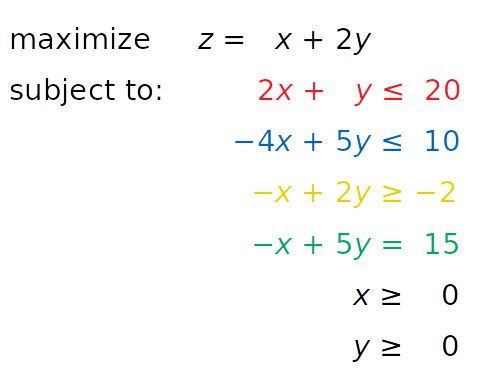

In [20]:
obj = [-1, -2]
#      ─┬  ─┬
#       │   └┤ Coefficient for y
#       └────┤ Coefficient for x

lhs_ineq = [[ 2,  1],  # Red constraint left side
            [-4,  5],  # Blue constraint left side
            [ 1, -2]]  # Yellow constraint left side

rhs_ineq = [20,  # Red constraint right side
            10,  # Blue constraint right side
             2]  # Yellow constraint right side

lhs_eq = [[-1, 5]]  # Green constraint left side
rhs_eq = [15]       # Green constraint right side

In [21]:
bnd = [(0, float("inf")),  # Bounds of x
       (0, float("inf"))]  # Bounds of y

In [22]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
              A_eq=lhs_eq, b_eq=rhs_eq, bounds=bnd,
              method="revised simplex")
opt

     con: array([0.])
     fun: -16.818181818181817
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 0.        , 18.18181818,  3.36363636])
  status: 0
 success: True
       x: array([7.72727273, 4.54545455])